<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading" data-toc-modified-id="Neuromatch-Academy-Project---Steinmetz-Dataset---Mouse-Mind-Reading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#explore-dictionary-for-session" data-toc-modified-id="explore-dictionary-for-session-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>explore dictionary for session</a></span></li></ul></li></ul></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#via-oneibl-by-client" data-toc-modified-id="via-oneibl-by-client-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>via oneibl by client</a></span></li><li><span><a href="#via-google-drive-directly" data-toc-modified-id="via-google-drive-directly-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>via google drive directly</a></span></li><li><span><a href="#cleanup-channel-infos" data-toc-modified-id="cleanup-channel-infos-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>cleanup channel infos</a></span></li><li><span><a href="#cleaning-up-spikes" data-toc-modified-id="cleaning-up-spikes-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>cleaning up spikes</a></span></li><li><span><a href="#cleanup-trial-info" data-toc-modified-id="cleanup-trial-info-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>cleanup trial info</a></span></li></ul></li></ul></li></ul></div>

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt

from nma_class import NMA_project

%matplotlib inline

In [203]:
# only if you are on jupyter notebook not if on colab
#import qgrid 

# Neuromatch Academy Project - Steinmetz Dataset - Mouse Mind Reading

In [204]:
# link to parent folder with all datasets
#main_folder = "/content/gdrive/My Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "C:/Users/User/Google Drive/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
#main_folder = "Z:/3 Projekte/Neuromatch Summer School/Projekt/steinmetz_dataset"
main_folder = '/Volumes/GoogleDrive/My Drive/NMA_Dataset/Dataset_1'

# create session object
nma_obj = NMA_project(main_folder) 

# default session is initialized, extract interesting dataframes in dedicated variables
session = nma_obj.std_session
channels_df = session['channels_df']
spikes_df = session['spikes_df']
clusters_df = session['clusters_df']


#### explore dictionary for session
- each ession is a dictionary
- each element kontains eather a numpy array or a dataframe
- the most important dataframes we are going to work with are:
    - clusters_df: all the spikes and clusters
    - trials_df: all the behaviour data for all trials

In [205]:
#how to pick a new variable from dataset "session"
some_var = session['spontaneous_intervals']
print(len(some_var))
some_var

4


array([[3.36666667e-03, 6.29002837e+01],
       [1.13001715e+03, 1.14616544e+03],
       [1.74804824e+03, 1.83516791e+03],
       [2.63250426e+03, 2.70003020e+03]])

In [206]:
for key in nma_obj.std_session.keys():
    print(key)

face_timestamps
trials_feedback_times
passiveVisual_times
clusters_templateWaveformChans
passiveVisual_contrastLeft
passiveVisual_contrastRight
passiveBeeps_times
trials_included
wheelMoves_intervals
channels_rawRow
clusters_peakChannel
channels_brainLocation
licks_times
Cori_2016-12-14_M2_g0_t0_imec_lf_timestamps
spikes_amps
trials_visualStim_times
probes_sitePositions
clusters_waveformDuration
passiveWhiteNoise_times
passiveValveClick_times
channels_sitePositions
eye_area
trials_visualStim_contrastRight
clusters_originalIDs
lickPiezo_timestamps
clusters_probes
wheel_timestamps
trials_intervals
clusters_depths
spikes_depths
trials_response_times
sparseNoise_positions
Cori_2016-12-14_V1_g0_t0_imec_lf_timestamps
probes_description
spikes_times
channels_site
eye_timestamps
spontaneous_intervals
eye_xyPos
trials_visualStim_contrastLeft
clusters__phy_annotation
clusters_templateWaveforms
lickPiezo_raw
probes_rawFilename
face_motionEnergy
channels_probe
trials_repNum
wheel_position
sparseNo

In [207]:
channels_df

,ccf_ap,ccf_dv,ccf_lr,allen_ontology,channel 0,channel 1,probe,raw row,channels_site
0,4432.3,4699.7,5002.3,LS,43.0,20.0,0.0,0,0
1,4428.4,4699.7,4970.6,LS,11.0,20.0,0.0,1,1
2,4431.3,4680.0,5018.6,LS,59.0,40.0,0.0,2,2
3,4427.3,4680.0,4986.8,LS,27.0,40.0,0.0,3,3
4,4426.3,4660.2,5003.1,LS,43.0,60.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...
743,9587.1,1073.8,2484.3,VISp,59.0,3800.0,1.0,378,378
744,9601.2,1054.6,2493.6,root,43.0,3820.0,1.0,380,380
745,9620.7,1054.6,2519.0,root,11.0,3820.0,1.0,381,381
746,9595.8,1035.4,2477.6,root,59.0,3840.0,1.0,382,382


In [208]:
clusters_df

,lable,probe,peak channel,spikes,total spikes
cluster,,,,,
0,3.0,0.0,224.0,"[0.8149, 14.822466666666667, 24.9646, 25.1436,...",826
1,3.0,0.0,316.0,"[0.0281, 0.7068666666666666, 1.3172, 1.4209666...",2818
2,3.0,0.0,172.0,"[77.22096666666667, 87.62533333333333, 87.7326...",3953
3,3.0,0.0,28.0,"[16.713966666666668, 22.983266666666665, 89.84...",646
4,1.0,0.0,34.0,"[0.8383666666666667, 1.4296666666666666, 5.238...",5124
...,...,...,...,...,...
1080,3.0,1.0,580.0,"[2.4490178426851834, 2.4553178708623205, 2.463...",82180
1081,3.0,1.0,415.0,"[4.736494740187061, 7.13337212698716, 7.138605...",3546
1082,3.0,1.0,449.0,"[10.78215511298693, 12.231561595517482, 13.026...",1624


In [209]:
spikes_df

,cluster,spike_times
0,527,0.003367
1,487,0.004733
2,243,0.006767
3,510,0.006933
4,435,0.007433
...,...,...
10017471,652,2702.642495
10017472,821,2702.643028
10017473,1008,2702.643028
10017474,813,2702.643128


In [210]:
#how to pick a new variable from dataset "session"
eye_area = session['eye_area']
eye_area

array([[2.0032918 ],
       [2.02172187],
       [2.02494752],
       ...,
       [3.79593869],
       [3.77562434],
       [3.78552977]])

In [211]:
# pars trials info =================================
# create spike_df tataframe, with each spike time and the cluster it belongs to
trial_df = pd.DataFrame( 
    { 'trials_resp_choice':session['trials_response_choice'][:,0], #-1 for Right choice (i.e. correct when stimuli are on the right); +1 for left choice; 0 for Nogo choice. Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. 
    'trials_resp_times': session['trials_response_times'][:,0], 
     
    'trials_goCue_times': session['trials_goCue_times'][:,0] ,#auditory cue
     
    'trials_vStim_cLeft': session['trials_visualStim_contrastLeft'][:,0], #A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).
    'trials_vStim_cRight': session['trials_visualStim_contrastRight'][:,0], 
    'trials_vStim_times': session['trials_visualStim_times'][:,0], 

    'trials_intervals': session['trials_intervals'][:,0], 
                                                
    'trials_feedback_times': session['trials_feedback_times'][:,0],
    'trials_feedbackType': session['trials_feedbackType'][:,0], # -1 negative - noise; 1 positive - water
    
    'trials_included': session['trials_included'][:,0], #Importantly, while this variable gives inclusion criteria according to the definition of disengagement (see manuscript Methods), it does not give inclusion criteria based on the time of response, as used for most analyses in the paper.
    'trials_repNum': session['trials_repNum'][:,0], #Trials are repeated if they are "easy" trials (high contrast stimuli with large difference between the two sides, or the blank screen condition) and this keeps track of how many times the current trial's condition has been repeated.
    },
                       )
#????? 
# add spikes to session dictionary
session['trial_df']=trial_df

In [212]:
trial_df

,trials_resp_choice,trials_resp_times,trials_goCue_times,trials_vStim_cLeft,trials_vStim_cRight,trials_vStim_times,trials_intervals,trials_feedback_times,trials_feedbackType,trials_included,trials_repNum
0,1.0,66.419612,66.296625,1.00,0.0,65.269408,62.900284,66.456227,1.0,True,1.0
1,-1.0,72.602206,72.077117,0.00,0.5,71.202703,68.420838,72.640326,1.0,True,1.0
2,1.0,77.001671,76.877593,1.00,0.5,76.052380,74.602902,77.038396,1.0,True,1.0
3,0.0,83.502065,81.996875,0.00,0.0,81.235263,79.003653,83.531699,1.0,True,1.0
4,1.0,87.617727,87.462962,0.50,1.0,86.800952,85.501795,87.628565,-1.0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.0,1111.564004,1110.888479,0.25,1.0,1110.110867,1109.529226,1111.571290,-1.0,False,5.0
210,1.0,1115.497692,1114.768541,0.25,1.0,1114.277333,1113.562081,1115.508153,-1.0,False,6.0
211,0.0,1120.232805,1118.729004,0.25,1.0,1117.926592,1117.495128,1120.237428,-1.0,False,7.0
212,0.0,1124.854126,1123.353878,0.25,1.0,1122.576266,1122.231454,1124.857902,-1.0,False,8.0


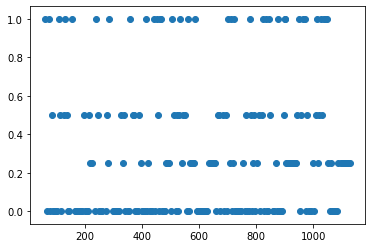

In [279]:
plt.scatter(trial_df.trials_intervals, trial_df.trials_vStim_cLeft)

In [218]:
# create new variable with true where all the contrast left is 0
is_0 =  trial_df['trials_vStim_cLeft'] ==0


# create new variable with true where all the contrast is 0 in both - NoGo trials
is_0_RL = (trial_df['trials_vStim_cLeft']==0) & (trial_df['trials_vStim_cRight']==0)
print(is_0_RL.head())

len(is_0_RL)

0    False
1    False
2    False
3     True
4    False
dtype: bool


214

In [219]:
# filter data by creating a new dataframe


In [220]:
# difference between consecutive rows - trials_intervals
# https://pythontic.com/pandas/dataframe-computations/difference

trials_intervals_diff = trial_df.trials_intervals.diff()

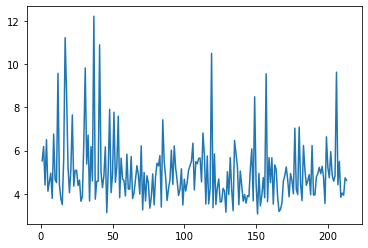

In [221]:
plt.plot(trials_intervals_diff)

In [256]:
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

# Create data frame only with the NoGo
trial2_df = trial_df.loc[(trial_df['trials_vStim_cLeft'] == 0) & (trial_df['trials_vStim_cRight']==0)]
trial2_df

,trials_resp_choice,trials_resp_times,trials_goCue_times,trials_vStim_cLeft,trials_vStim_cRight,trials_vStim_times,trials_intervals,trials_feedback_times,trials_feedbackType,trials_included,trials_repNum
3,0.0,83.502065,81.996875,0.0,0.0,81.235263,79.003653,83.531699,1.0,True,1.0
5,1.0,92.167720,91.837432,0.0,0.0,90.650613,89.617592,92.197438,-1.0,True,1.0
6,-1.0,97.117508,96.572307,0.0,0.0,95.984298,94.167702,97.126316,-1.0,True,2.0
7,-1.0,100.900586,100.157164,0.0,0.0,99.550755,99.117619,100.907576,-1.0,True,3.0
8,0.0,107.663576,106.157660,0.0,0.0,105.566451,102.902255,107.704085,1.0,True,4.0
11,0.0,126.403458,124.897959,0.0,0.0,123.716340,118.833840,126.433983,1.0,True,1.0
16,0.0,154.949572,153.444014,0.0,0.0,152.697202,145.730701,154.979639,1.0,True,1.0
18,-1.0,168.863679,168.598656,0.0,0.0,167.830244,165.596946,168.872260,-1.0,True,1.0
19,-1.0,172.913387,172.534318,0.0,0.0,171.412701,170.863626,172.915924,-1.0,True,2.0
20,0.0,178.034969,176.529182,0.0,0.0,175.479965,174.913822,178.065607,1.0,True,3.0


In [242]:
#plt.plot(trial_df.trials_feedbackType)
trial_df.trials_feedbackType

df4 = trial_df['trials_feedbackType']({'a': trial_df['trials_feedbackType'] == 1, 'b': trial_df['trials_feedbackType'] == -1})
plt.figure();
ax = df4.plot.area()


TypeError: 'Series' object is not callable

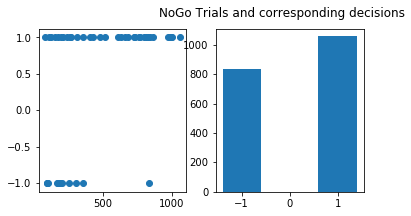

In [278]:
#https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

plt.subplot(132)
plt.bar(trial2_df['trials_feedbackType'], trial2_df['trials_vStim_times'],)

plt.suptitle('NoGo Trials and corresponding decisions')
plt.show()

#plt.scatter(trial2_df['trials_vStim_times'],trial2_df['trials_feedbackType'])

#plotting, within 0 contrast (NoGo trials), how many times they did false positives, i.e., turned the wheel 


NameError: name 'count' is not defined

Useful links: 

data: 
https://www.w3resource.com/pandas/dataframe/dataframe-plot-area.php
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

plot: 
https://matplotlib.org/3.3.0/tutorials/introductory/pyplot.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
